In [1]:
pip install imbalanced-Learn

Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [2]:
import pandas as pd
import numpy 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
df=pd.read_csv(r"Datasets/Data_u.csv")

C:\Users\vsneg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,sport,dport,pkts,bytes,seq,dur,mean,stddev,sum,min,...,srate,drate,attack,category,subcategory,proto,saddr,daddr,state,record
0,138,138,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,...,0.00278,0.00000,0,Normal,Normal,3,11,18,4,2
1,60864,443,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,...,0.06247,0.02677,0,Normal,Normal,2,6,8,3,2
2,138,138,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,...,0.00410,0.00000,0,Normal,Normal,3,12,18,4,2
3,36682,22,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,...,24.50990,28.59489,1,Theft,Data_Exfiltration,2,4,19,3,2
4,36684,22,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,...,4.05358,4.98902,1,Theft,Data_Exfiltration,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,51760,3306,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,...,30.35009,25.29174,1,Reconnaissance,Service_Scan,2,4,19,3,2
151179,34720,3306,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,...,30.28651,25.23876,1,Reconnaissance,Service_Scan,2,3,19,3,2
151180,37616,3306,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,...,30.16652,25.13877,1,Reconnaissance,Service_Scan,2,2,19,3,2
151181,46406,3306,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,...,30.29752,25.24793,1,Reconnaissance,Service_Scan,2,1,19,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151183 entries, 0 to 151182
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sport        151183 non-null  object 
 1   dport        151183 non-null  object 
 2   pkts         151183 non-null  int64  
 3   bytes        151183 non-null  int64  
 4   seq          151183 non-null  int64  
 5   dur          151183 non-null  float64
 6   mean         151183 non-null  float64
 7   stddev       151183 non-null  float64
 8   sum          151183 non-null  float64
 9   min          151183 non-null  float64
 10  max          151183 non-null  float64
 11  spkts        151183 non-null  int64  
 12  dpkts        151183 non-null  int64  
 13  sbytes       151183 non-null  int64  
 14  dbytes       151183 non-null  int64  
 15  rate         151183 non-null  float64
 16  srate        151183 non-null  float64
 17  drate        151183 non-null  float64
 18  attack       151183 non-

In [6]:
df.drop(['attack', 'category','sport','dport'], axis=1, inplace=True)

In [7]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,subcategory,proto,saddr,daddr,state,record
0,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,0.00000,4,...,0,0.00278,0.00278,0.00000,Normal,3,11,18,4,2
1,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,0.04468,8,...,356,0.09817,0.06247,0.02677,Normal,2,6,8,3,2
2,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,0.00011,4,...,0,0.00410,0.00410,0.00000,Normal,3,12,18,4,2
3,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,0.48960,13,...,3458,55.14728,24.50990,28.59489,Data_Exfiltration,2,4,19,3,2
4,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,3.20705,14,...,3670,9.35441,4.05358,4.98902,Data_Exfiltration,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,0.19769,7,...,581,60.70018,30.35009,25.29174,Service_Scan,2,4,19,3,2
151179,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,0.19811,7,...,581,60.57302,30.28651,25.23876,Service_Scan,2,3,19,3,2
151180,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,0.19890,7,...,581,60.33304,30.16652,25.13877,Service_Scan,2,2,19,3,2
151181,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,0.19804,7,...,581,60.59504,30.29752,25.24793,Service_Scan,2,1,19,3,2


<AxesSubplot:xlabel='subcategory', ylabel='count'>

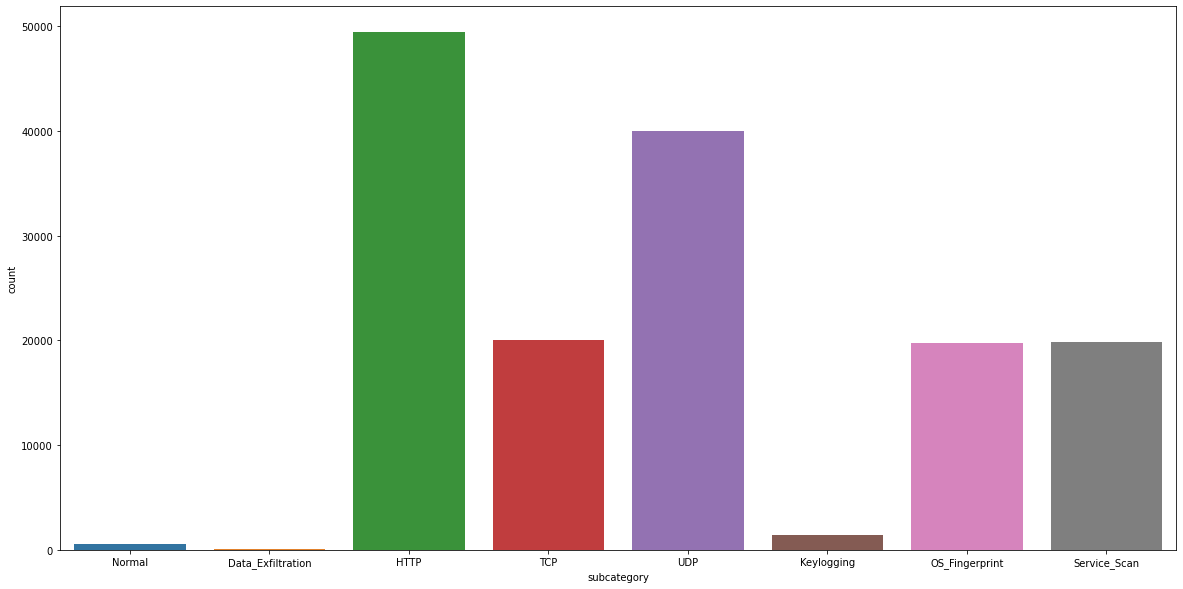

In [8]:
fig_dim=(20,10)
fig,ax=plt.subplots(figsize=fig_dim)
sns.countplot(x="subcategory",data=df,ax=ax)

## Label Encoding

In [9]:
le = preprocessing.LabelEncoder()
df['subcategory'] = le.fit_transform(df.subcategory.values)

In [10]:
X=df.drop(["subcategory"], axis="columns")
Y=df["subcategory"]

## Over-sampling (SMOTE)

In [11]:
oversample = SMOTE()
x_sm,y_sm = oversample.fit_resample(X, Y)

In [12]:
y_sm.value_counts()

3    49421
0    49421
1    49421
6    49421
7    49421
2    49421
4    49421
5    49421
Name: subcategory, dtype: int64

In [13]:
df = pd.concat([x_sm, y_sm], axis=1, join='inner')

In [14]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,subcategory
0,4,986,15,1080.37891,0.00000,0.00000,0.000000,0.00000,0.00000,4,...,0,0.00278,0.00278,0.00000,3,11,18,4,2,3
1,12,1053,12,112.04757,0.02427,0.01594,0.072810,0.00579,0.04468,8,...,356,0.09817,0.06247,0.02677,2,6,8,3,2,3
2,4,1086,23,731.27210,0.00010,0.00000,0.000210,0.00010,0.00011,4,...,0,0.00410,0.00410,0.00000,3,12,18,4,2,3
3,28,5098,30,0.48960,0.48960,0.00000,0.489600,0.48960,0.48960,13,...,3458,55.14728,24.50990,28.59489,2,4,19,3,2,0
4,31,5472,31,3.20705,3.20705,0.00000,3.207050,3.20705,3.20705,14,...,3670,9.35441,4.05358,4.98902,2,4,19,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395363,14,840,2451,15.51692,3.00711,1.73617,12.028460,0.00000,4.02116,14,...,0,0.83780,0.83780,0.00000,3,1,19,4,0,7
395364,7,420,16598,26.11566,2.74527,1.58792,10.981084,0.00000,3.81621,7,...,0,0.22975,0.22975,0.00000,3,2,24,4,2,7
395365,10,600,3065,29.37217,1.75860,1.24441,10.551610,0.00000,2.71313,10,...,0,0.30641,0.30641,0.00000,3,1,25,4,2,7
395366,7,420,15734,26.11786,2.74587,1.58826,10.983480,0.00000,3.81688,7,...,0,0.22973,0.22973,0.00000,3,2,24,4,2,7


In [15]:
X=df.drop(["subcategory"], axis="columns")
Y=df["subcategory"]

# Considering the best 10 features through Feature Selection(SelectKBest)

## Feature Selection

In [16]:
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X, Y)

SelectKBest()

# Top 10 features for the model 

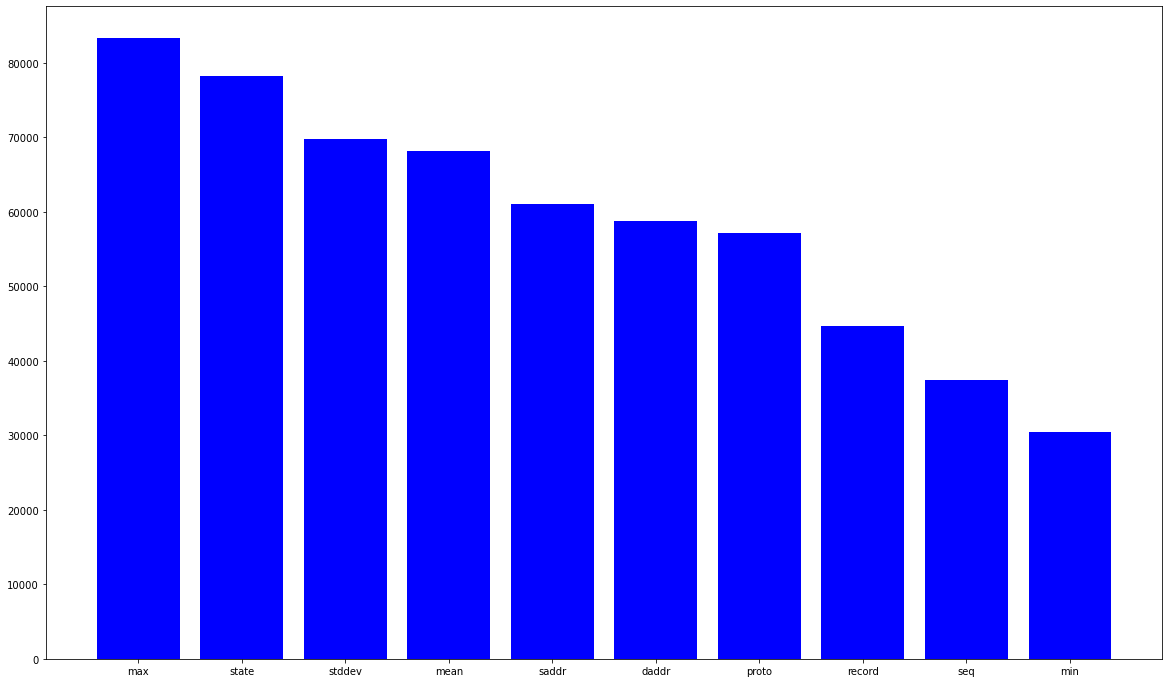

In [17]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(10):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(10)]], color='b', align='center')
plt.show()

In [18]:
cols = fs.get_support(indices=True)
df1 = df.iloc[:,cols]

In [19]:
df1["subcategory"]=df["subcategory"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_19536/1789617014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["subcategory"]=df["subcategory"]


## Correlation of each column

In [20]:
df1.corr()

,seq,mean,stddev,min,max,proto,saddr,daddr,state,record,subcategory
seq,1.000000,-0.101742,0.044583,-0.107046,-0.074903,0.121211,-0.265496,0.024162,0.052216,-0.124199,0.539676
mean,-0.101742,1.000000,0.463019,0.821072,0.970358,0.274046,-0.069217,-0.115387,-0.480365,-0.589575,0.058441
stddev,0.044583,0.463019,1.000000,-0.016809,0.645154,0.354434,-0.246953,-0.033636,-0.252272,-0.364388,0.322855
min,-0.107046,0.821072,-0.016809,1.000000,0.716862,0.116586,-0.024099,-0.111951,-0.352119,-0.494283,-0.128451
max,-0.074903,0.970358,0.645154,0.716862,1.000000,0.310898,-0.121964,-0.107608,-0.465084,-0.593127,0.109195
proto,0.121211,0.274046,0.354434,0.116586,0.310898,1.000000,-0.116896,0.358288,-0.625139,-0.346956,0.278924
saddr,-0.265496,-0.069217,-0.246953,-0.024099,-0.121964,-0.116896,1.000000,0.156156,-0.119642,0.197137,-0.398393
daddr,0.024162,-0.115387,-0.033636,-0.111951,-0.107608,0.358288,0.156156,1.000000,-0.449784,0.070426,-0.034387
state,0.052216,-0.480365,-0.252272,-0.352119,-0.465084,-0.625139,-0.119642,-0.449784,1.000000,0.212758,0.025029
record,-0.124199,-0.589575,-0.364388,-0.494283,-0.593127,-0.346956,0.197137,0.070426,0.212758,1.000000,-0.385394


In [21]:
corr_matrix=df1.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

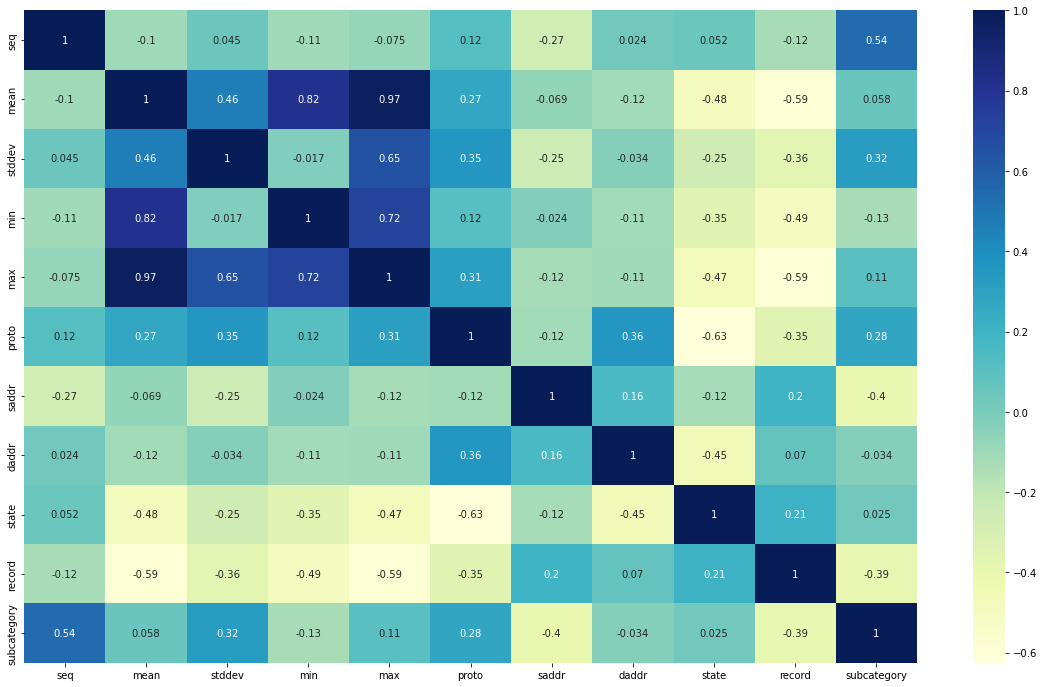

In [22]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [23]:
X=df1.drop(["subcategory"], axis="columns")
Y=df1["subcategory"]

## Train-Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [25]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [26]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [27]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [28]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top10_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [29]:
algorithm.append("Logistic Regression")

In [30]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [31]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [32]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [34]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

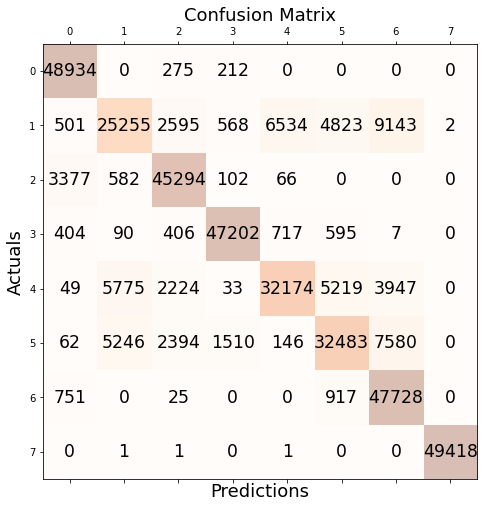

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [36]:
algorithm.append("Decision Tree")

In [37]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [38]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [39]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [40]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [41]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

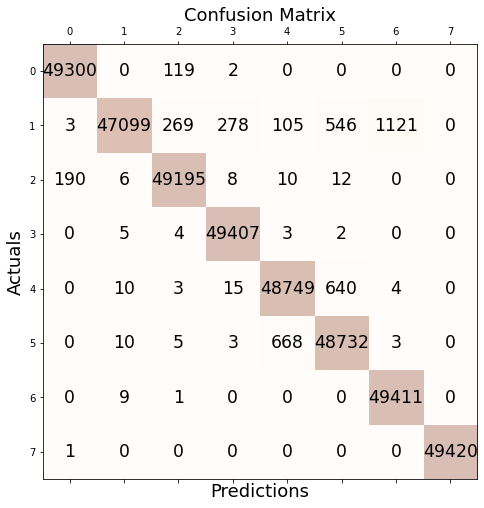

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [43]:
algorithm.append("Random Forest")

In [44]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [45]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [46]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [47]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [48]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

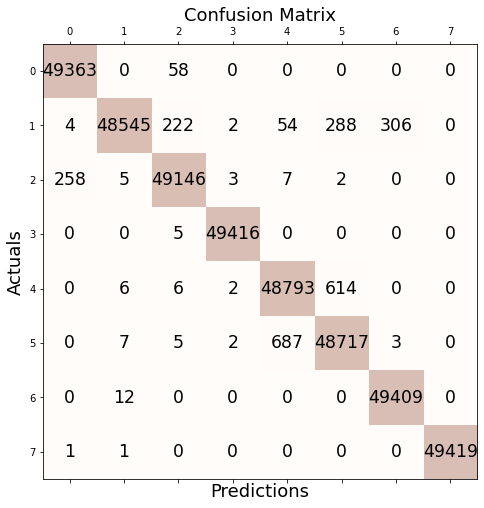

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [50]:
algorithm.append("KNN")

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [52]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [53]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [54]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [55]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

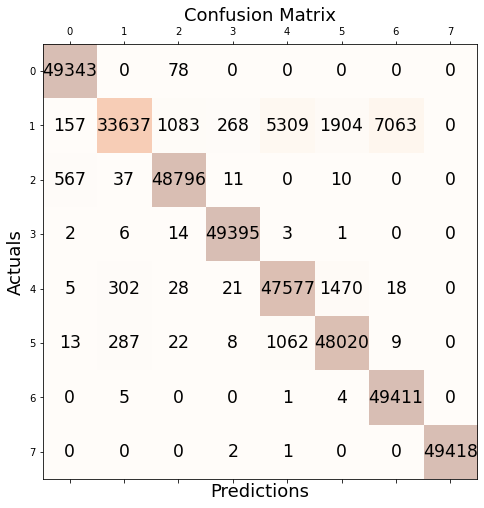

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [57]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [58]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.839821,0.830841,0.830841,0.819046,0.169159
1,Decision Tree,0.990064,0.989744,0.989744,0.989702,0.010256
2,Random Forest,0.993577,0.993525,0.993525,0.993520,0.006475
3,KNN,0.957036,0.949993,0.949993,0.947530,0.050007


<AxesSubplot:xlabel='Algorithms'>

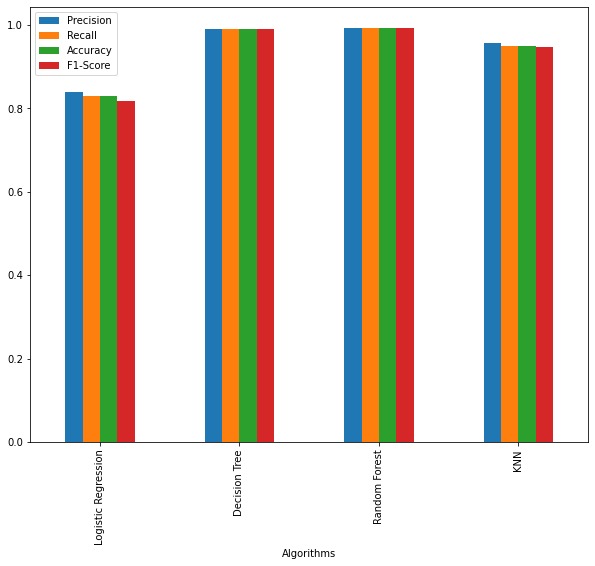

In [59]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

## ANN

In [60]:
algorithm.append("ANN")

In [61]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
8649/8649 [==============================] - 8s 778us/step - loss: 0.5531 - accuracy: 0.7954
Epoch 2/10
8649/8649 [==============================] - 6s 739us/step - loss: 0.3733 - accuracy: 0.8579
Epoch 3/10
8649/8649 [==============================] - 7s 769us/step - loss: 0.3369 - accuracy: 0.8769
Epoch 4/10
8649/8649 [==============================] - 6s 746us/step - loss: 0.3119 - accuracy: 0.8846
Epoch 5/10
8649/8649 [==============================] - 10s 1ms/step - loss: 0.2946 - accuracy: 0.8884
Epoch 6/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.2828 - accuracy: 0.8912
Epoch 7/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.2742 - accuracy: 0.8938
Epoch 8/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.2679 - accuracy: 0.8959
Epoch 9/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.2625 - accuracy: 0.8981
Epoch 10/10
8649/8649 [==============================] - 12s 1ms/step

In [63]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [64]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [65]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

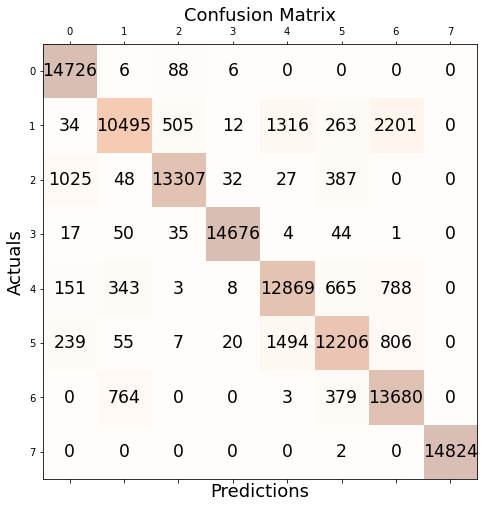

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [67]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [68]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top10_df = pd.DataFrame(columns = column_names)

In [69]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [70]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.839821,0.830841,0.830841,0.819046,0.169159
1,Decision Tree,0.990064,0.989744,0.989744,0.989702,0.010256
2,Random Forest,0.993577,0.993525,0.993525,0.993520,0.006475
3,KNN,0.957036,0.949993,0.949993,0.947530,0.050007
4,ANN,0.903475,0.900279,0.900279,0.899303,0.099721


<AxesSubplot:xlabel='Algorithms'>

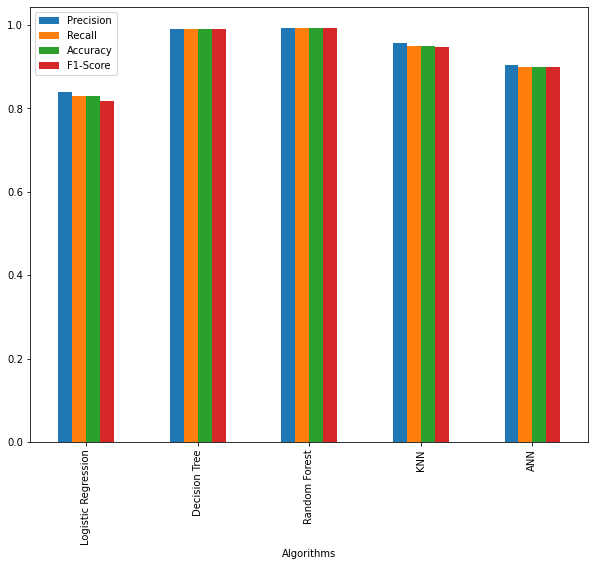

In [71]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering the best 15 features through Feature Selection(SelectKBest)

In [72]:
X=df.drop(["subcategory"], axis="columns")
Y=df["subcategory"]

## Feature Selection

In [73]:
fs = SelectKBest(score_func=f_classif, k=15)
fs.fit(X, Y)

SelectKBest(k=15)

# Top 15 features for the model 

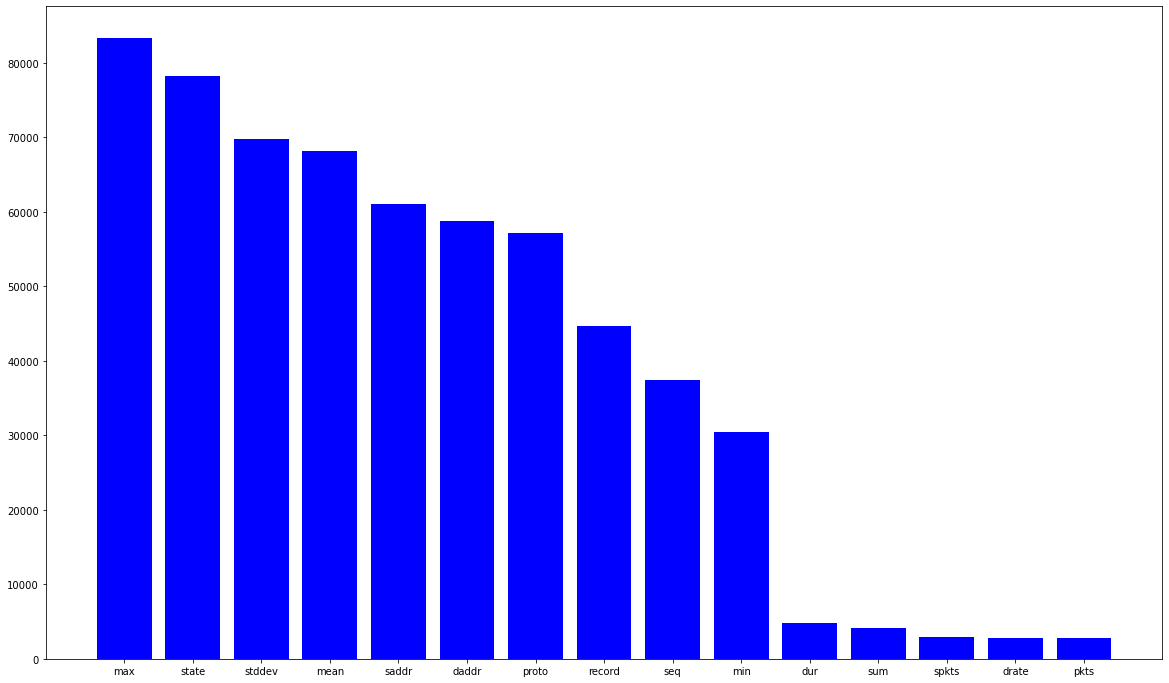

In [74]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(15):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(15)]], color='b', align='center')
plt.show()

In [75]:
cols = fs.get_support(indices=True)
df2 = df.iloc[:,cols]

In [76]:
df2["subcategory"]=df["subcategory"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_19536/3014695237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["subcategory"]=df["subcategory"]


## Correlation of each column

In [77]:
df2.corr()

,pkts,seq,dur,mean,stddev,sum,min,max,spkts,drate,proto,saddr,daddr,state,record,subcategory
pkts,1.000000,-0.098253,0.748934,0.283528,0.053724,0.740151,0.039058,0.243686,0.937400,-0.009652,-0.001978,0.167512,-0.022136,-0.170320,0.021995,-0.041789
seq,-0.098253,1.000000,-0.110927,-0.101742,0.044583,-0.103350,-0.107046,-0.074903,-0.096616,-0.082652,0.121211,-0.265496,0.024162,0.052216,-0.124199,0.539676
dur,0.748934,-0.110927,1.000000,0.292105,0.093837,0.907021,0.016864,0.266205,0.772579,-0.021026,-0.001417,0.222689,-0.021988,-0.203198,0.020785,-0.045903
mean,0.283528,-0.101742,0.292105,1.000000,0.463019,0.320251,0.821072,0.970358,0.282674,-0.076360,0.274046,-0.069217,-0.115387,-0.480365,-0.589575,0.058441
stddev,0.053724,0.044583,0.093837,0.463019,1.000000,0.067001,-0.016809,0.645154,0.044038,-0.059317,0.354434,-0.246953,-0.033636,-0.252272,-0.364388,0.322855
sum,0.740151,-0.103350,0.907021,0.320251,0.067001,1.000000,0.040796,0.280050,0.818851,-0.014029,-0.003209,0.205788,-0.018669,-0.185004,0.006704,-0.020623
min,0.039058,-0.107046,0.016864,0.821072,-0.016809,0.040796,1.000000,0.716862,0.033179,-0.055920,0.116586,-0.024099,-0.111951,-0.352119,-0.494283,-0.128451
max,0.243686,-0.074903,0.266205,0.970358,0.645154,0.280050,0.716862,1.000000,0.240965,-0.081205,0.310898,-0.121964,-0.107608,-0.465084,-0.593127,0.109195
spkts,0.937400,-0.096616,0.772579,0.282674,0.044038,0.818851,0.033179,0.240965,1.000000,-0.010683,-0.003982,0.178410,-0.022017,-0.162806,0.021222,-0.035543
drate,-0.009652,-0.082652,-0.021026,-0.076360,-0.059317,-0.014029,-0.055920,-0.081205,-0.010683,1.000000,-0.050901,0.000264,-0.037969,0.014099,0.036992,-0.168564


In [78]:
corr_matrix=df2.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

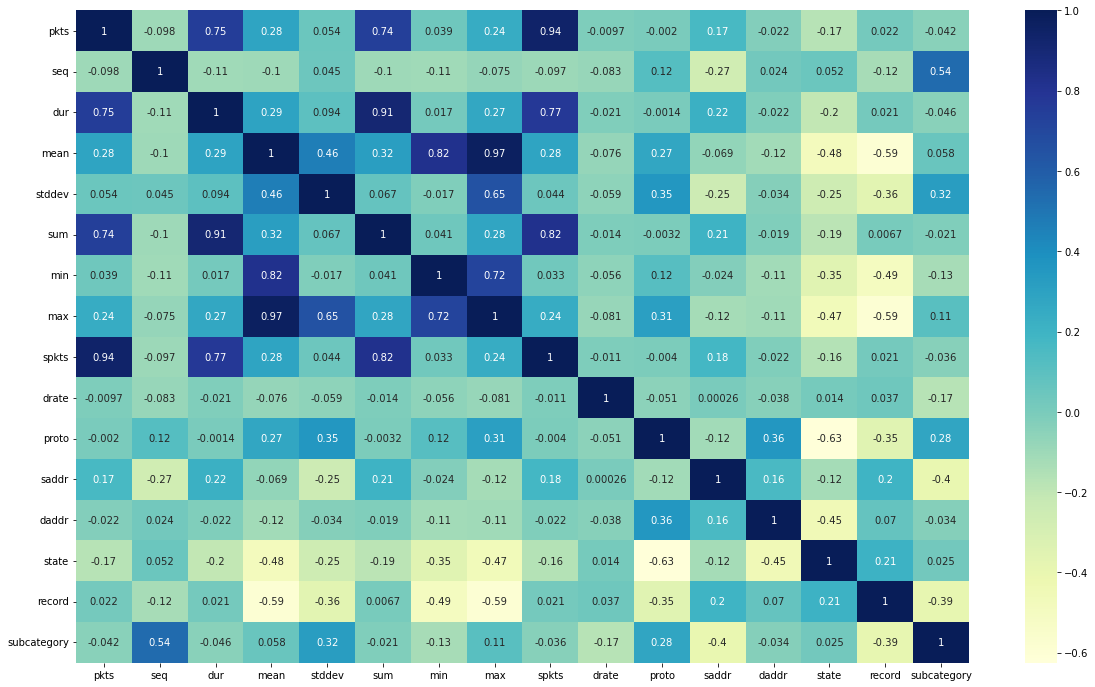

In [79]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [80]:
X=df2.drop(["subcategory"], axis="columns")
Y=df2["subcategory"]

## Train-Test Split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [82]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [83]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [84]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top15_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [85]:
algorithm.append("Logistic Regression")

In [86]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [87]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [88]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [89]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [90]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

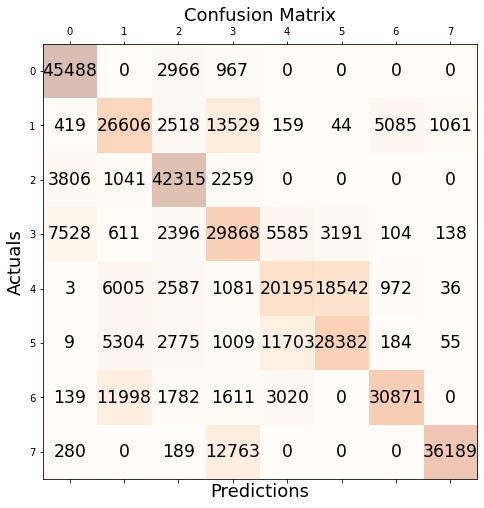

In [91]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [92]:
algorithm.append("Decision Tree")

In [93]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [94]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [95]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [96]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [97]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

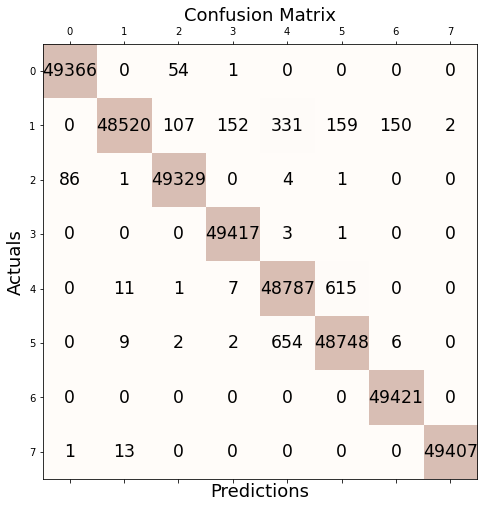

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [99]:
algorithm.append("Random Forest")

In [100]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [101]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [102]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [103]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [104]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

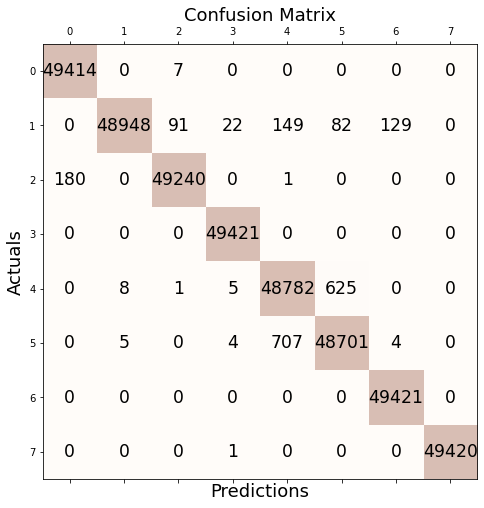

In [105]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [106]:
algorithm.append("KNN")

In [107]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [108]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [109]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [110]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [111]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

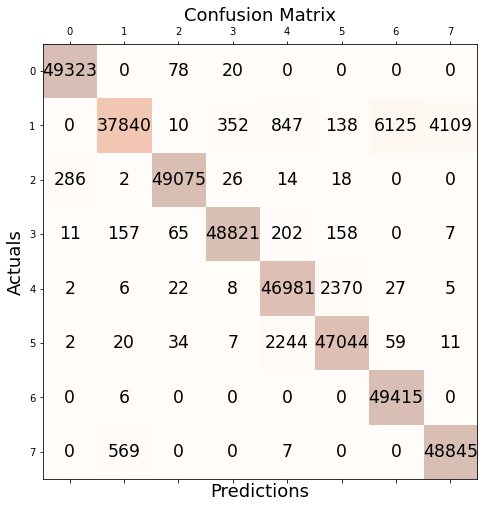

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [113]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [114]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.672381,0.657398,0.657398,0.638401,0.342602
1,Decision Tree,0.994078,0.993998,0.993998,0.993983,0.006002
2,Random Forest,0.994918,0.994888,0.994888,0.994884,0.005112
3,KNN,0.957297,0.954412,0.954412,0.953086,0.045588


<AxesSubplot:xlabel='Algorithms'>

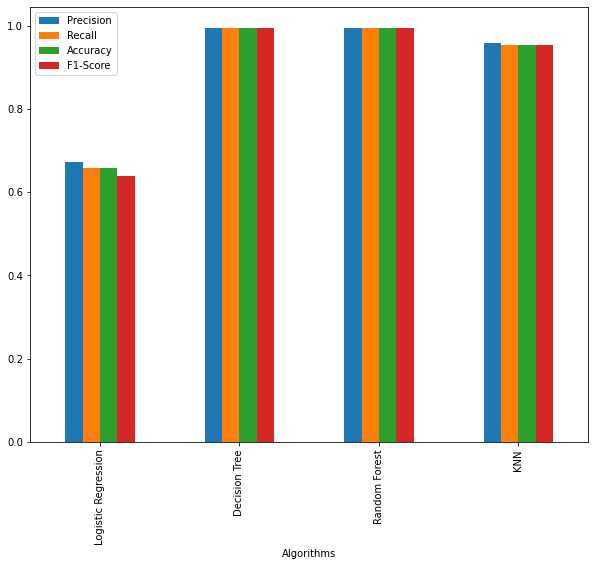

In [115]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [116]:
algorithm.append("ANN")

In [117]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                256       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.6970 - accuracy: 0.7608
Epoch 2/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.4652 - accuracy: 0.8282
Epoch 3/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.4094 - accuracy: 0.8531
Epoch 4/10
8649/8649 [==============================] - 11s 1ms/step - loss: 0.3720 - accuracy: 0.8634
Epoch 5/10
8649/8649 [==============================] - 11s 1ms/step - loss: 0.3397 - accuracy: 0.8767
Epoch 6/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.3112 - accuracy: 0.8886
Epoch 7/10
8649/8649 [==============================] - 13s 1ms/step - loss: 0.2860 - accuracy: 0.9018
Epoch 8/10
8649/8649 [==============================] - 12s 1ms/step - loss: 0.2652 - accuracy: 0.9108
Epoch 9/10
8649/8649 [==============================] - 10s 1ms/step - loss: 0.2478 - accuracy: 0.9191
Epoch 10/10
8649/8649 [==============================] - 11s 1ms/step - l

In [119]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [120]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [121]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

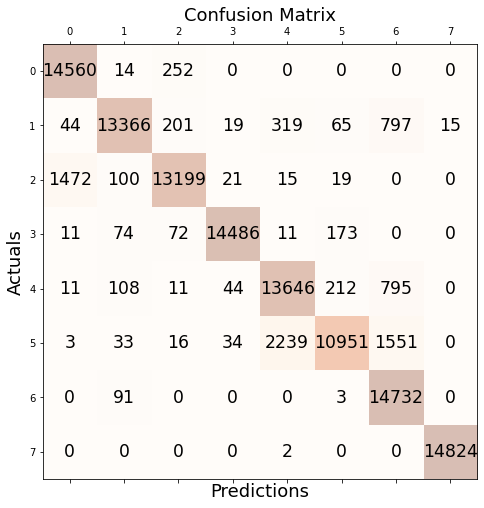

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [123]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [124]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top15_df = pd.DataFrame(columns = column_names)

In [125]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [126]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.672381,0.657398,0.657398,0.638401,0.342602
1,Decision Tree,0.994078,0.993998,0.993998,0.993983,0.006002
2,Random Forest,0.994918,0.994888,0.994888,0.994884,0.005112
3,KNN,0.957297,0.954412,0.954412,0.953086,0.045588
4,ANN,0.931016,0.925413,0.925412,0.924692,0.074588


<AxesSubplot:xlabel='Algorithms'>

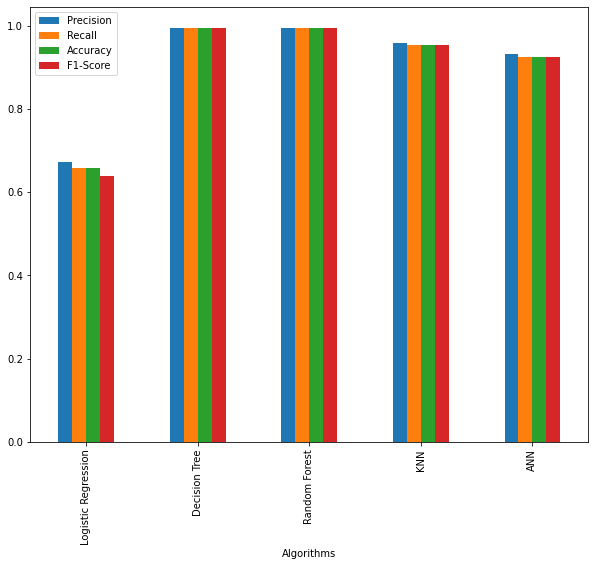

In [127]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering all 21 features

## Correlation of each column

In [128]:
df.corr()

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,subcategory
pkts,1.000000,0.584798,-0.098253,0.748934,0.283528,0.053724,0.740151,0.039058,0.243686,0.937400,...,0.364140,-0.015660,-0.006289,-0.009652,-0.001978,0.167512,-0.022136,-0.170320,0.021995,-0.041789
bytes,0.584798,1.000000,-0.083065,0.410584,0.198672,0.138125,0.318176,0.004826,0.196824,0.472143,...,0.848057,-0.013257,-0.005740,-0.007709,-0.018034,0.088972,-0.022637,-0.125253,0.020975,-0.088118
seq,-0.098253,-0.083065,1.000000,-0.110927,-0.101742,0.044583,-0.103350,-0.107046,-0.074903,-0.096616,...,-0.052788,-0.013314,-0.026712,-0.082652,0.121211,-0.265496,0.024162,0.052216,-0.124199,0.539676
dur,0.748934,0.410584,-0.110927,1.000000,0.292105,0.093837,0.907021,0.016864,0.266205,0.772579,...,0.241234,-0.027219,-0.013809,-0.021026,-0.001417,0.222689,-0.021988,-0.203198,0.020785,-0.045903
mean,0.283528,0.198672,-0.101742,0.292105,1.000000,0.463019,0.320251,0.821072,0.970358,0.282674,...,0.127708,-0.093773,-0.053201,-0.076360,0.274046,-0.069217,-0.115387,-0.480365,-0.589575,0.058441
stddev,0.053724,0.138125,0.044583,0.093837,0.463019,1.000000,0.067001,-0.016809,0.645154,0.044038,...,0.095545,-0.070852,-0.041401,-0.059317,0.354434,-0.246953,-0.033636,-0.252272,-0.364388,0.322855
sum,0.740151,0.318176,-0.103350,0.907021,0.320251,0.067001,1.000000,0.040796,0.280050,0.818851,...,0.146907,-0.018446,-0.008553,-0.014029,-0.003209,0.205788,-0.018669,-0.185004,0.006704,-0.020623
min,0.039058,0.004826,-0.107046,0.016864,0.821072,-0.016809,0.040796,1.000000,0.716862,0.033179,...,-0.003203,-0.068840,-0.039342,-0.055920,0.116586,-0.024099,-0.111951,-0.352119,-0.494283,-0.128451
max,0.243686,0.196824,-0.074903,0.266205,0.970358,0.645154,0.280050,0.716862,1.000000,0.240965,...,0.123556,-0.099122,-0.056616,-0.081205,0.310898,-0.121964,-0.107608,-0.465084,-0.593127,0.109195
spkts,0.937400,0.472143,-0.096616,0.772579,0.282674,0.044038,0.818851,0.033179,0.240965,1.000000,...,0.202005,-0.015444,-0.006056,-0.010683,-0.003982,0.178410,-0.022017,-0.162806,0.021222,-0.035543


In [129]:
corr_matrix=df.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

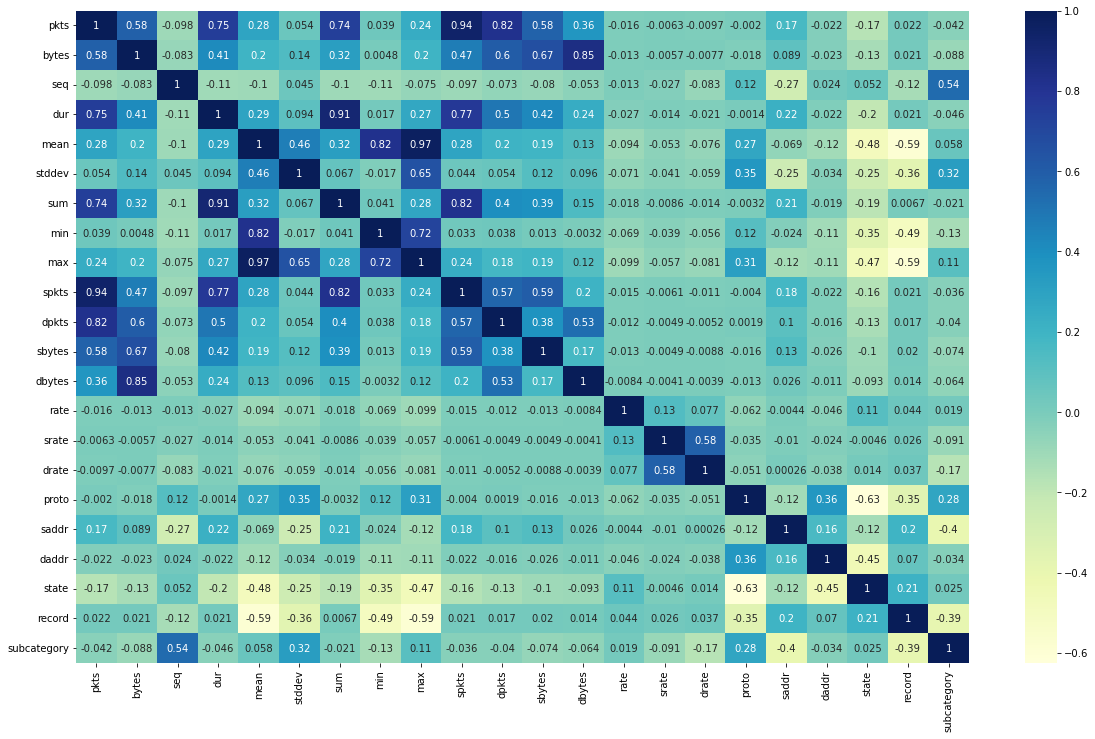

In [130]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [131]:
X=df.drop(["subcategory"], axis="columns")
Y=df["subcategory"]

## Train-Test Split

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [133]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [134]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [135]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [136]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
all_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [137]:
algorithm.append("Logistic Regression")

In [138]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [139]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [140]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [141]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [142]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

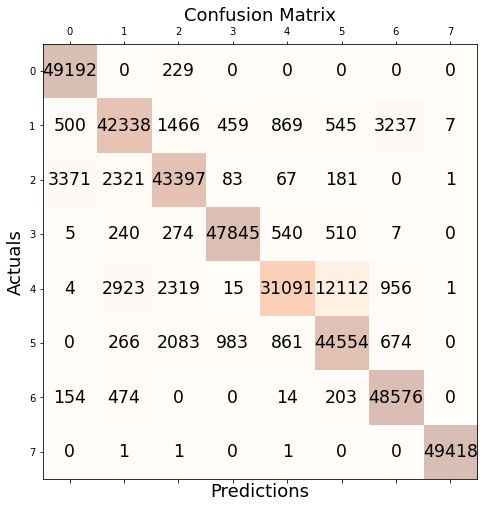

In [143]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [144]:
algorithm.append("Decision Tree")

In [145]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [146]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [147]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [148]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [149]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

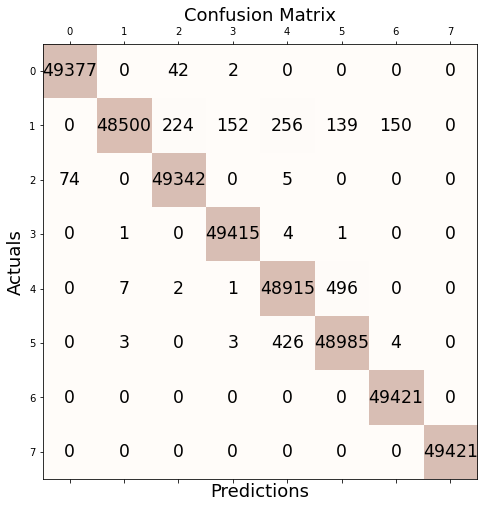

In [150]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [151]:
algorithm.append("Random Forest")

In [152]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [153]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [154]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [155]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [156]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

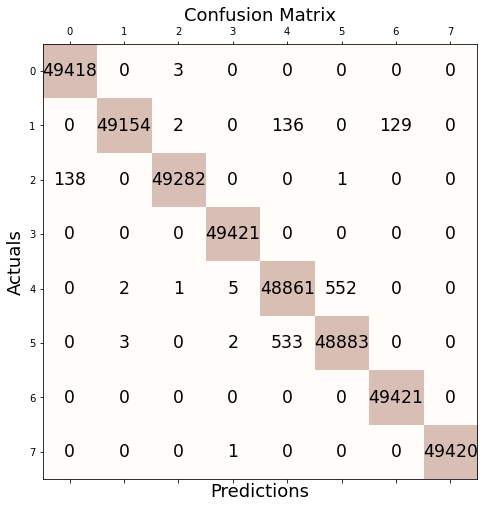

In [157]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [158]:
algorithm.append("KNN")

In [159]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [160]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [161]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [162]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [163]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

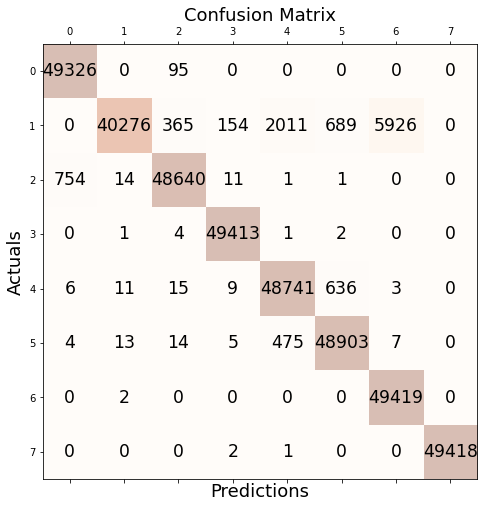

In [164]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [165]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [166]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.907187,0.901466,0.901466,0.896672,0.098534
1,Decision Tree,0.995040,0.994962,0.994962,0.994949,0.005038
2,Random Forest,0.996206,0.996186,0.996186,0.996183,0.003814
3,KNN,0.976278,0.971591,0.971591,0.970534,0.028409


<AxesSubplot:xlabel='Algorithms'>

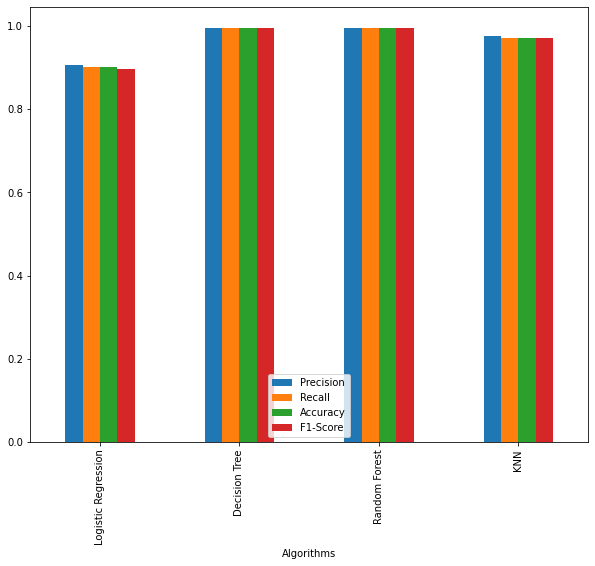

In [167]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [168]:
algorithm.append("ANN")

In [169]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                352       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
8649/8649 [==============================] - 8s 876us/step - loss: 0.6449 - accuracy: 0.7829
Epoch 2/10
8649/8649 [==============================] - 7s 842us/step - loss: 0.3871 - accuracy: 0.8595
Epoch 3/10
8649/8649 [==============================] - 7s 750us/step - loss: 0.3180 - accuracy: 0.8882
Epoch 4/10
8649/8649 [==============================] - 7s 790us/step - loss: 0.2758 - accuracy: 0.9016
Epoch 5/10
8649/8649 [==============================] - 6s 736us/step - loss: 0.2466 - accuracy: 0.9114
Epoch 6/10
8649/8649 [==============================] - 7s 794us/step - loss: 0.2249 - accuracy: 0.9178
Epoch 7/10
8649/8649 [==============================] - 7s 752us/step - loss: 0.2075 - accuracy: 0.9258
Epoch 8/10
8649/8649 [==============================] - 7s 845us/step - loss: 0.1931 - accuracy: 0.93490s - loss: 0.193
Epoch 9/10
8649/8649 [==============================] - 7s 810us/step - loss: 0.1804 - accuracy: 0.9420
Epoch 10/10
8649/8649 [=========================

In [171]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [172]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [173]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

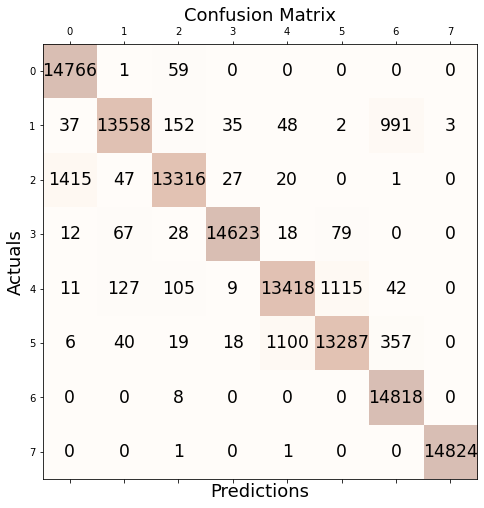

In [174]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [175]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [176]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
all_df = pd.DataFrame(columns = column_names)

In [177]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [178]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.907187,0.901466,0.901466,0.896672,0.098534
1,Decision Tree,0.995040,0.994962,0.994962,0.994949,0.005038
2,Random Forest,0.996206,0.996186,0.996186,0.996183,0.003814
3,KNN,0.976278,0.971591,0.971591,0.970534,0.028409
4,ANN,0.950671,0.949407,0.949406,0.949202,0.050594


<AxesSubplot:xlabel='Algorithms'>

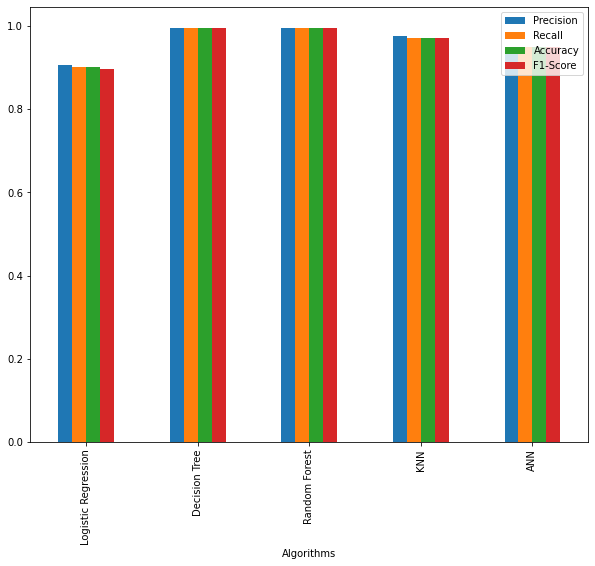

In [179]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# GridSearchCV

In [180]:
model_params = {
    'Logisitic Regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [0.1,1,10],
            'penalty':['l1','l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12],

        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [10,100,200],
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12]
        }
    },

    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,6,7,8,9,10,20]
    
        } 
        
    }     
}

In [181]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=10, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ,return_train_score=True,refit="accuracy")
    clf.fit(X, Y)
    i=clf.best_index_
    scores.append({
        'Algorithms': model_name,
        'Precision': clf.cv_results_['mean_test_precision_macro'][i],
        'Recall': clf.cv_results_['mean_test_recall_macro'][i],
        'Accuracy': clf.best_score_,
        'F1-score': clf.cv_results_['mean_test_f1_macro'][i],
        'Best Parameters': clf.best_params_
    })

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedM

In [182]:
GSC_results = pd.DataFrame(scores,columns=['Algorithms','Precision', 'Recall', 'Accuracy', 'F1-score', 'Best Parameters'])
GSC_results

,Algorithms,Precision,Recall,Accuracy,F1-score,Best Parameters
0,Logisitic Regression,0.897051,0.891766,0.891767,0.887380,"{'C': 1, 'penalty': 'l2'}"
1,Decision Tree,0.987190,0.986860,0.986860,0.986843,"{'criterion': 'entropy', 'max_depth': 12}"
2,Random Forest,0.986534,0.986451,0.986451,0.986448,"{'criterion': 'entropy', 'max_depth': 12, 'n_e..."
3,KNN,0.976254,0.971606,0.971606,0.970559,{'n_neighbors': 6}


<AxesSubplot:xlabel='Algorithms'>

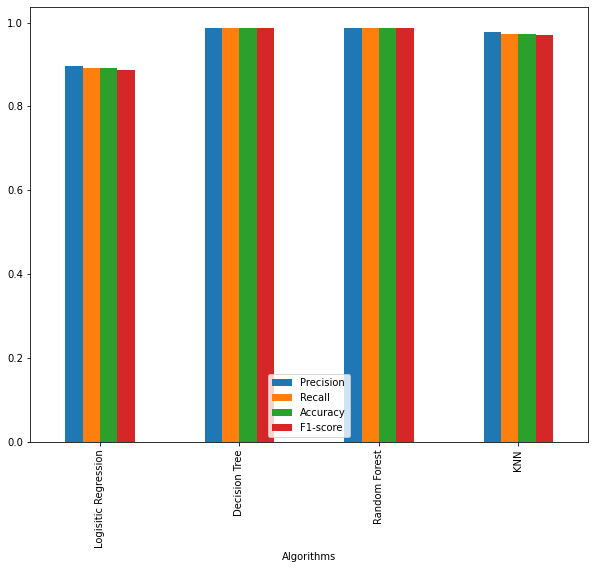

In [183]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
GSC_results.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-score"], kind="bar", ax=ax)

In [184]:
GSC_results["Best Parameters"]

0                            {'C': 1, 'penalty': 'l2'}
1            {'criterion': 'entropy', 'max_depth': 12}
2    {'criterion': 'entropy', 'max_depth': 12, 'n_e...
3                                   {'n_neighbors': 6}
Name: Best Parameters, dtype: object